A dvd\_magyar adatbázisból a dvd tábla oszlopain végzett adatprofilozás:

1\. dvd-tábla azon belül nettoar-oszlopon végzett: min, max, átlag, szórás.

In [2]:
SELECT MIN(nettoar) AS "Min érték", 
       MAX(nettoar) AS "Max érték", 
       AVG(nettoar) AS "Átlag", 
       STDEV(nettoar) AS "Szórás", 
       VAR(nettoar) AS "Eltérés"
FROM dvd
WHERE nettoar IS NOT NULL

(1 row affected)

Total execution time: 00:00:00.013

Min érték,Max érték,Átlag,Szórás,Eltérés
3102,6098,"4682,336477987421","871,86613556767","760150,5583497026"


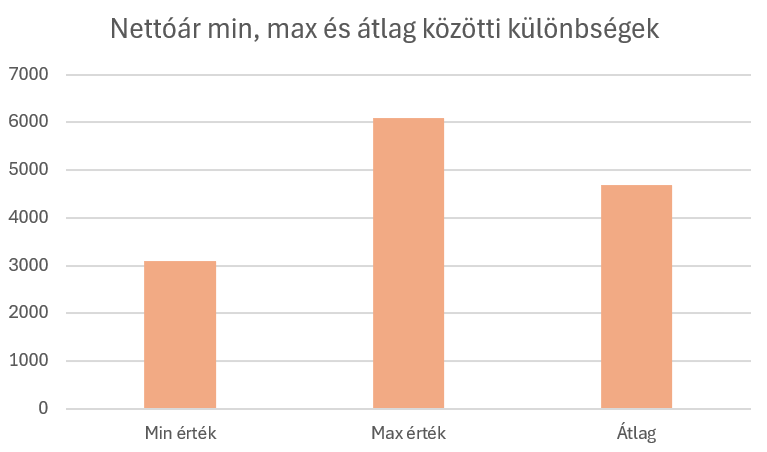

2. dvd-tábla azon belül cim-oszlopon végzett: címek min. hossza, címek max. hossza, címek átlag hossza, címek hosszának szórása, címek hosszának eltérése.

In [4]:
SELECT MIN(LEN(cim)) AS "Cim min hossza", 
       MAX(LEN(cim)) AS "Cim max hossza", 
       AVG(LEN(cim)) AS "Cim átlag hossza", 
       STDEV(LEN(cim)) AS "Cim hosszának szórása", 
       VAR(LEN(cim)) AS "Cim hosszainak eltérése"
FROM dvd
WHERE cim IS NOT NULL
AND LEN(cim) > 0

(1 row affected)

Total execution time: 00:00:00.015

Cim min hossza,Cim max hossza,Cim átlag hossza,Cim hosszának szórása,Cim hosszainak eltérése
5,63,26,"11,473970479414376","131,65199856247258"


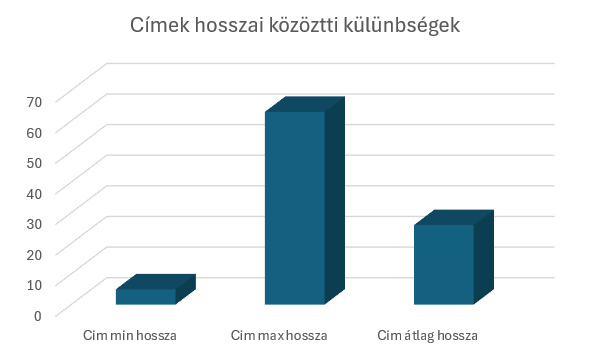

3. dvd-tábla azon belül stilus-oszlopon végzett üres, illetve nem üres sorok összehasonlítása.

In [7]:
SELECT sor_tipus AS "Sor stilus",
    COUNT(*) "Sor számláló"
FROM 
    (SELECT 
        CASE WHEN stilus IS NULL THEN 'Üres'
            ELSE 'Nem Üres' 
            END AS sor_tipus
        FROM dvd) rows
GROUP BY sor_tipus

(2 rows affected)

Total execution time: 00:00:00.011

Sor stilus,Sor számláló
Nem Üres,317
Üres,1


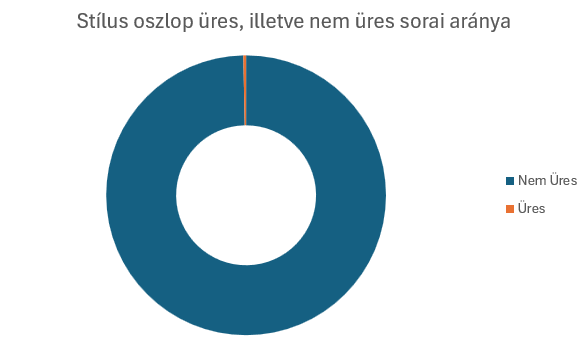

4. dvd-tábla azon belül stilus-oszlopon végzett top 10 stílus lekérdezése.

In [9]:
SELECT TOP 10
    stilus AS "DVD stílusok", 
    COUNT(*) AS "db szám"
from dvd
WHERE stilus IS NOT null
GROUP BY stilus
ORDER BY COUNT(*) desc

(10 rows affected)

Total execution time: 00:00:00.012

DVD stílusok,db szám
játék,60
ismeretterjesztő,46
nyelvtanító,42
történelem,41
földrajz,16
irodalom,16
matematika,9
csillagászat,7
szótár,7
felvételi,6


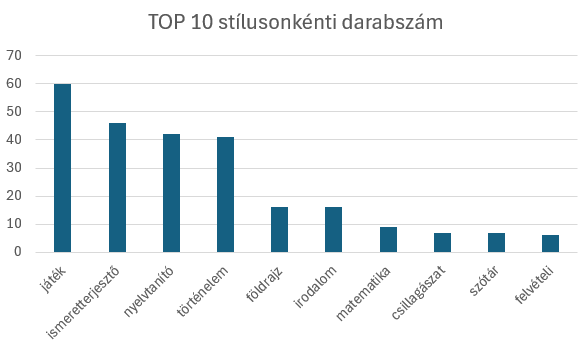